In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from ttb import WILDSDataset

In [26]:
ds = WILDSDataset("waterbirds", T=5000, log_step=1000, gamma=0.1, alpha = 1e-3, sampler="default")
ds.reset()

<Figure size 432x288 with 0 Axes>

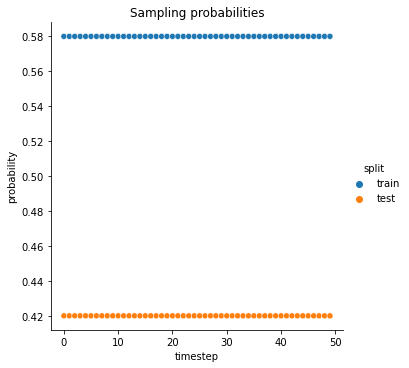

In [25]:
ds.visualize()

In [20]:
ds.permutation

[('train', 4735),
 ('test', 2804),
 ('train', 975),
 ('test', 733),
 ('test', 5366),
 ('test', 2946),
 ('test', 4208),
 ('train', 3538),
 ('train', 2027),
 ('test', 4753),
 ('test', 1409),
 ('train', 572),
 ('train', 3255),
 ('train', 1714),
 ('train', 313),
 ('test', 608),
 ('test', 3337),
 ('train', 2516),
 ('test', 5627),
 ('train', 762),
 ('test', 1000),
 ('test', 3271),
 ('test', 2149),
 ('train', 2107),
 ('train', 473),
 ('test', 4324),
 ('test', 3345),
 ('train', 2857),
 ('train', 4402),
 ('train', 1045),
 ('train', 1516),
 ('train', 1654),
 ('test', 1196),
 ('test', 4238),
 ('test', 342),
 ('test', 1719),
 ('train', 1537),
 ('train', 3330),
 ('test', 3566),
 ('test', 913),
 ('test', 1028),
 ('test', 1961),
 ('test', 2010),
 ('test', 3658),
 ('train', 1476),
 ('train', 831),
 ('train', 2564),
 ('test', 5639),
 ('test', 2429),
 ('test', 4942)]